In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print("cp1")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

cp1


Installing fastai library

In [2]:
!pip install fastai
print("cp2")

cp2


Import the vision stuff from fastai library

In [3]:
from fastai.vision.all import *
print("cp3")

cp3


In [4]:
!echo "c.NotebookApp.ip = '0.0.0.0'" >> ~/.jupyter/jupyter_notebook_config.py
print("cp3.5")

cp3.5


Specifically importing untar_data (just to make sure)

In [5]:
from fastai.data.external import untar_data
print(URLs.PETS)
print("cp3.6")

https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz
cp3.6


Setting the path, which would be used as input by datablock

In [6]:
path = untar_data(URLs.PETS)
print("cp4")

cp4


In [7]:
path.ls()
print("cp4.5")

cp4.5


Checking the number of images present in the data set

In [8]:
files = get_image_files(path/"images")
len(files)

7390

These are the path of these two particular images

In [9]:
files[0],files[6]


(Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_115.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_128.jpg'))

Defining the label function, which will be used as input by Datablock function

In [10]:
def label_func(f): return f[0].isupper()
print("cp5")

cp5


Now creating dataloader object

In [11]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))
print("cp6")

cp6


This is to see the sample (batch) of images in the dataloader  

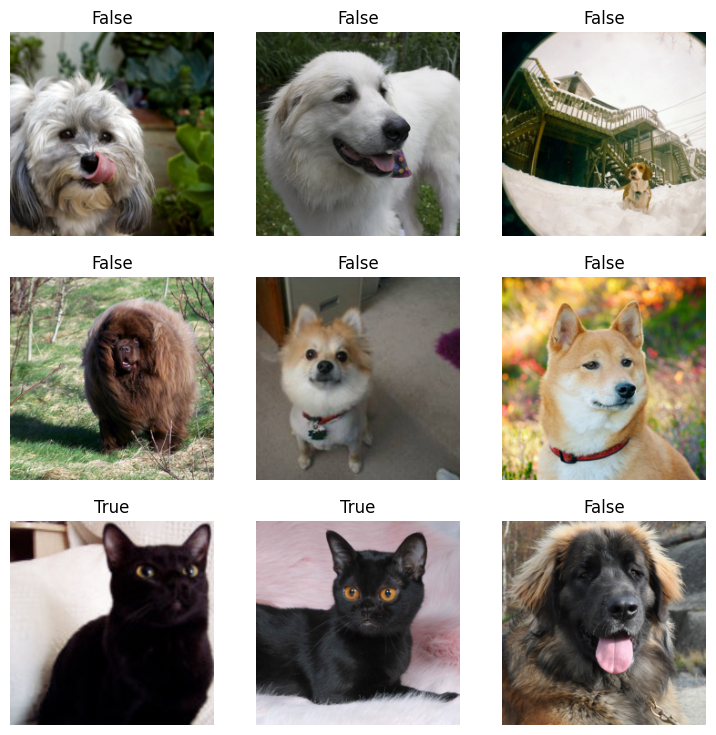

In [12]:
dls.show_batch()

Learn - the model  
dls - data that we are feeding into the model  
resnet34 - specifies the architecture of the model  
error_rate - specifies the metrics of measuring the error or deviation from precision of this model's performance

In [13]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 80.4MB/s]


In [14]:
print("cp7")

cp7


This trains the model   
Number of Epoch is 1.   
Epoch - Number of iterations that the model goes through the data

In [15]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.136520,0.015178,0.006766,00:26


epoch,train_loss,valid_loss,error_rate,time
0,0.060187,0.029606,0.006766,00:32


^ Here we see that the error is less than 1%. This states the model is performing well.

Predict is used to see if the input file is a cat or not (dog).   
In this case, its not a cat and hence a dog.

In [16]:
learn.predict(files[1])

('False', tensor(0), tensor([9.9943e-01, 5.7331e-04]))

Our model's result can seen with the actual answers.  
Here, all the predicted correctly.

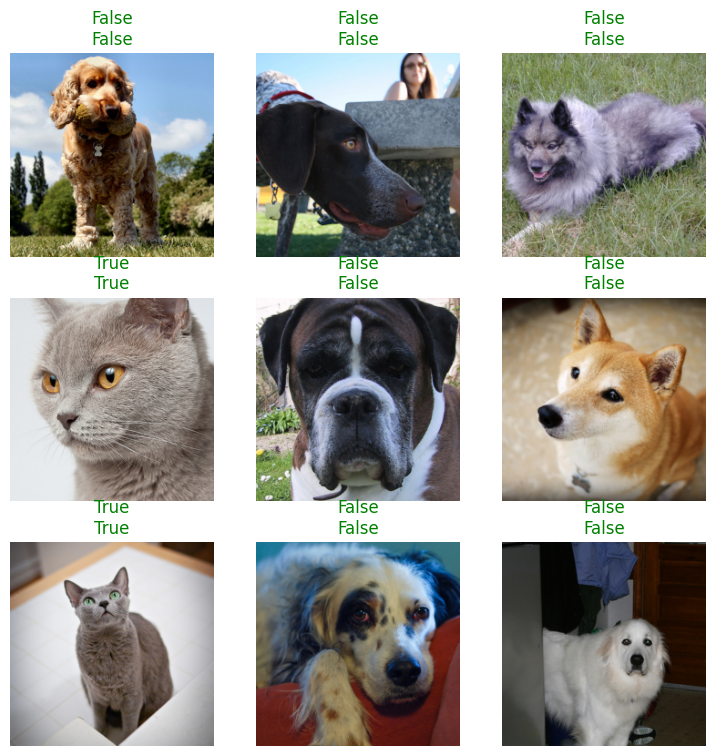

In [17]:
learn.show_results()

.name shows the name of the file

In [18]:
files[0].name

'beagle_115.jpg'

We are using regex to get the breed name of the animal, which is everything before the last occurence of underscore. 

In [19]:
pat = r'^(.*)_\d+.jpg'
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

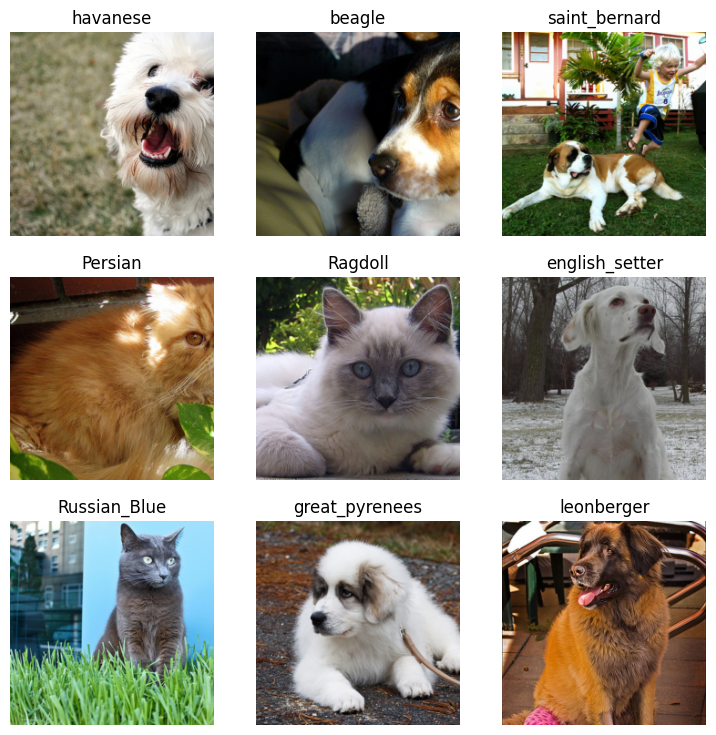

In [20]:
dls.show_batch()

In [21]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

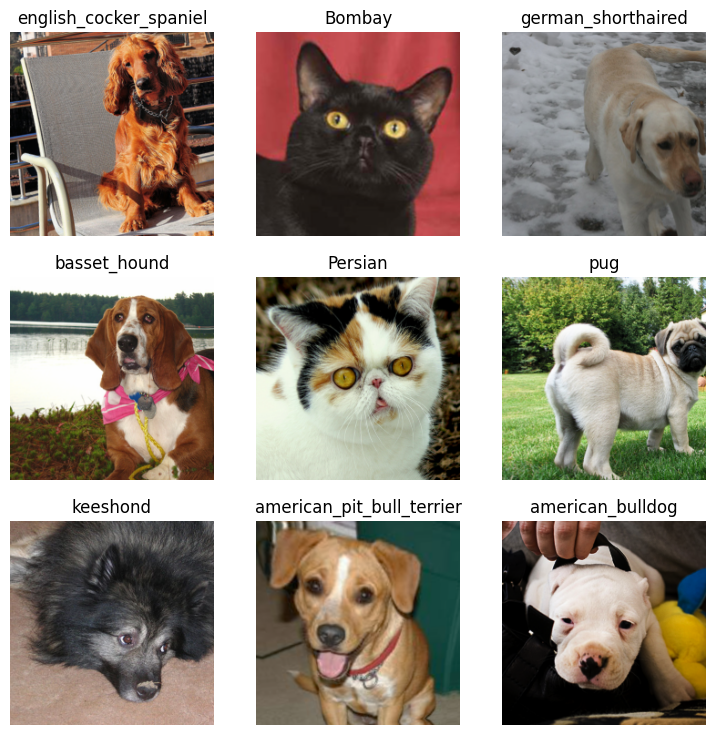

In [22]:
dls.show_batch()

In [23]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

lr_find shows the learning rate for training the model

SuggestedLRs(valley=0.0010000000474974513)

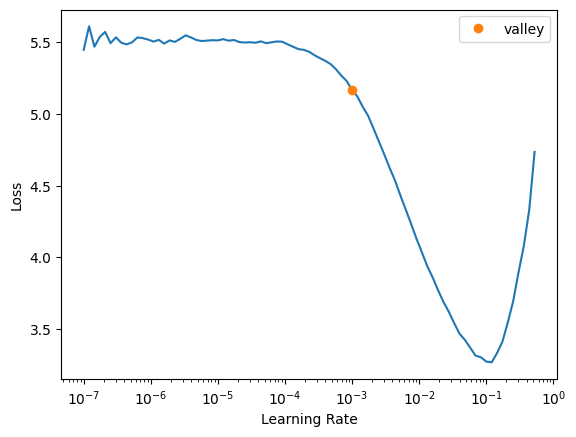

In [24]:
learn.lr_find()

In [26]:
learn.export('cvdmodel.pkl')
print("cpfinal")

cpfinal
